In [94]:
import pandas as pd
import numpy as np
from math import ceil

# plotting
import matplotlib.pyplot as plt
#import seaborn as sns

# handling trajectory and other geo-data
import geopandas as gpd
import movingpandas as mpd
from shapely.geometry import Point, LineString, Polygon
from shapely import wkt
from shapely.wkt import loads



In [2]:
points_df = pd.read_pickle('C:/Users/David/Documents/Anteckningar/Project in Data Science/Data/points.pkl')
display(points_df.head())
trajs_df = pd.read_pickle('C:/Users/David/Documents/Anteckningar/Project in Data Science/Data/trajectories.pkl')
display(trajs_df.head())

,x,y,timestamp,trajectory_sid
931193,322906.188012,6.416545e+06,2019-09-04 15:58:49+02:00,1
931194,322874.393157,6.416413e+06,2019-09-04 15:58:54+02:00,1
931195,322844.134677,6.416278e+06,2019-09-04 15:58:59+02:00,1
931196,322816.213664,6.416140e+06,2019-09-04 15:59:04+02:00,1
931197,322794.293079,6.415999e+06,2019-09-04 15:59:09+02:00,1


,start_time,stop_time,duration,data_points,distance,speed,line
sid,,,,,,,
1,2019-09-04 15:18:24+02:00,2019-09-04 16:03:24+02:00,2700,541,64885,86.513333,LINESTRING(342610.0375303831 6464707.887463389...
3,2019-10-19 18:55:00+02:00,2019-10-19 20:54:12+02:00,7152,1429,206390,103.887584,LINESTRING(324460.85687151505 6386857.17920074...
4,2019-10-28 04:13:07+01:00,2019-10-28 05:14:17+01:00,3670,648,96755,94.909537,LINESTRING(321475.2318731322 6398016.731461379...
7,2019-11-23 09:10:37+01:00,2019-11-23 10:06:47+01:00,3370,670,77225,82.495549,LINESTRING(329279.0401737231 6403344.895843207...
11,2019-09-16 18:05:00+02:00,2019-09-16 18:53:53+02:00,2933,507,75961,93.235459,LINESTRING(320825.56008272676 6399036.57844181...


In [3]:
first_20_rows = points_df[:20000]
first_20_rows['segment_distance'] = np.nan
first_20_rows['segment_duration'] = np.nan
first_20_rows

<ipython-input-3-9d031e6b59f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_20_rows['segment_distance'] = np.nan
<ipython-input-3-9d031e6b59f8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_20_rows['segment_duration'] = np.nan


,x,y,timestamp,trajectory_sid,segment_distance,segment_duration
931193,322906.188012,6.416545e+06,2019-09-04 15:58:49+02:00,1,NaN,NaN
931194,322874.393157,6.416413e+06,2019-09-04 15:58:54+02:00,1,NaN,NaN
931195,322844.134677,6.416278e+06,2019-09-04 15:58:59+02:00,1,NaN,NaN
931196,322816.213664,6.416140e+06,2019-09-04 15:59:04+02:00,1,NaN,NaN
931197,322794.293079,6.415999e+06,2019-09-04 15:59:09+02:00,1,NaN,NaN
...,...,...,...,...,...,...
17093,319508.304776,6.398900e+06,2019-10-13 15:11:57+02:00,9422,NaN,NaN
17094,319518.981726,6.398830e+06,2019-10-13 15:12:34+02:00,9422,NaN,NaN
17095,319613.096197,6.398281e+06,2019-10-13 15:13:36+02:00,9422,NaN,NaN
17096,319390.272205,6.398221e+06,2019-10-13 15:14:39+02:00,9422,NaN,NaN


In [4]:
for i in range(len(first_20_rows)):
    if i == 0:
        #first_20_rows.iloc[0]['segment_distance'] = 0
        first_20_rows.iat[0, 4] = 0
        #print("First row segment d: ", first_20_rows.iloc[0]['segment_distance'])
    else:
        try:
            if first_20_rows.iloc[i-1]['trajectory_sid'] != first_20_rows.iloc[i]['trajectory_sid']:
                #first_20_rows.iloc[i]['segment_distance'] = 0
                first_20_rows.iat[i, 4] = 0
                #print("New row with new ID segment d: ", first_20_rows.iloc[i]['segment_distance'])

            if first_20_rows.iloc[i-1]['trajectory_sid'] == first_20_rows.iloc[i]['trajectory_sid']:
                t1 = (first_20_rows.iloc[i-1]['x'], first_20_rows.iloc[i-1]['y'])
                t2 = (first_20_rows.iloc[i]['x'], first_20_rows.iloc[i]['y'])
                d = Point(t1).distance(Point(t2))
                #first_20_rows.iloc[i]['segment_distance'] = d
                first_20_rows.iat[i, 4] = d
                #print("segment d: ", first_20_rows.iloc[i]['segment_distance'])

            else:
                pass
            
        except:
            pass

In [5]:
for i in range(len(first_20_rows)):
    if i == 0:
        first_20_rows.iat[i, 5] = np.nan

    else:
        try:
            if first_20_rows.iloc[i-1]['trajectory_sid'] != first_20_rows.iloc[i]['trajectory_sid']:
                first_20_rows.iat[i, 5] = np.nan
                #first_20_rows.iat[i, 5] = first_20_rows.iloc[i]['segment_duration'].total_seconds()

            if first_20_rows.iloc[i-1]['trajectory_sid'] == first_20_rows.iloc[i]['trajectory_sid']:
                time1 = first_20_rows.iloc[i-1]['timestamp']
                time2 = first_20_rows.iloc[i]['timestamp']
                d_time = time2 - time1
                first_20_rows.iat[i, 5] = d_time
                first_20_rows.iat[i, 5] = first_20_rows.iloc[i]['segment_duration'].total_seconds()

            else:
                pass
            
        except:
            pass



In [6]:
first_20_rows['segment_velocity (m/s)'] = 0
first_20_rows

<ipython-input-6-efdac19db751>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_20_rows['segment_velocity (m/s)'] = 0


,x,y,timestamp,trajectory_sid,segment_distance,segment_duration,segment_velocity (m/s)
931193,322906.188012,6.416545e+06,2019-09-04 15:58:49+02:00,1,0.000000,NaN,0
931194,322874.393157,6.416413e+06,2019-09-04 15:58:54+02:00,1,135.705800,5.0,0
931195,322844.134677,6.416278e+06,2019-09-04 15:58:59+02:00,1,138.138039,5.0,0
931196,322816.213664,6.416140e+06,2019-09-04 15:59:04+02:00,1,141.131807,5.0,0
931197,322794.293079,6.415999e+06,2019-09-04 15:59:09+02:00,1,142.752909,5.0,0
...,...,...,...,...,...,...,...
17093,319508.304776,6.398900e+06,2019-10-13 15:11:57+02:00,9422,543.597683,76.0,0
17094,319518.981726,6.398830e+06,2019-10-13 15:12:34+02:00,9422,70.940398,37.0,0
17095,319613.096197,6.398281e+06,2019-10-13 15:13:36+02:00,9422,556.770314,62.0,0
17096,319390.272205,6.398221e+06,2019-10-13 15:14:39+02:00,9422,230.767747,63.0,0


In [7]:
first_20_rows['segment_velocity (m/s)'] = np.where(
    first_20_rows['segment_duration'] != 0,
    first_20_rows['segment_distance'] / first_20_rows['segment_duration'],
    0
)

<ipython-input-7-360b02b65eb9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_20_rows['segment_velocity (m/s)'] = np.where(


In [8]:
first_20_rows['segment_velocity (km/h)'] = first_20_rows['segment_velocity (m/s)'] * 3.6
first_20_rows

<ipython-input-8-c3a5e754ae97>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_20_rows['segment_velocity (km/h)'] = first_20_rows['segment_velocity (m/s)'] * 3.6


,x,y,timestamp,trajectory_sid,segment_distance,segment_duration,segment_velocity (m/s),segment_velocity (km/h)
931193,322906.188012,6.416545e+06,2019-09-04 15:58:49+02:00,1,0.000000,NaN,NaN,NaN
931194,322874.393157,6.416413e+06,2019-09-04 15:58:54+02:00,1,135.705800,5.0,27.14116,97.708176
931195,322844.134677,6.416278e+06,2019-09-04 15:58:59+02:00,1,138.138039,5.0,27.627608,99.459388
931196,322816.213664,6.416140e+06,2019-09-04 15:59:04+02:00,1,141.131807,5.0,28.226361,101.614901
931197,322794.293079,6.415999e+06,2019-09-04 15:59:09+02:00,1,142.752909,5.0,28.550582,102.782095
...,...,...,...,...,...,...,...,...
17093,319508.304776,6.398900e+06,2019-10-13 15:11:57+02:00,9422,543.597683,76.0,7.152601,25.749364
17094,319518.981726,6.398830e+06,2019-10-13 15:12:34+02:00,9422,70.940398,37.0,1.917308,6.902309
17095,319613.096197,6.398281e+06,2019-10-13 15:13:36+02:00,9422,556.770314,62.0,8.980166,32.328599
17096,319390.272205,6.398221e+06,2019-10-13 15:14:39+02:00,9422,230.767747,63.0,3.66298,13.186728


In [9]:
first_20_rows['segment acceleration (m/s^2)'] = 0
first_20_rows

<ipython-input-9-3619e04b2cb8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_20_rows['segment acceleration (m/s^2)'] = 0


,x,y,timestamp,trajectory_sid,segment_distance,segment_duration,segment_velocity (m/s),segment_velocity (km/h),segment acceleration (m/s^2)
931193,322906.188012,6.416545e+06,2019-09-04 15:58:49+02:00,1,0.000000,NaN,NaN,NaN,0
931194,322874.393157,6.416413e+06,2019-09-04 15:58:54+02:00,1,135.705800,5.0,27.14116,97.708176,0
931195,322844.134677,6.416278e+06,2019-09-04 15:58:59+02:00,1,138.138039,5.0,27.627608,99.459388,0
931196,322816.213664,6.416140e+06,2019-09-04 15:59:04+02:00,1,141.131807,5.0,28.226361,101.614901,0
931197,322794.293079,6.415999e+06,2019-09-04 15:59:09+02:00,1,142.752909,5.0,28.550582,102.782095,0
...,...,...,...,...,...,...,...,...,...
17093,319508.304776,6.398900e+06,2019-10-13 15:11:57+02:00,9422,543.597683,76.0,7.152601,25.749364,0
17094,319518.981726,6.398830e+06,2019-10-13 15:12:34+02:00,9422,70.940398,37.0,1.917308,6.902309,0
17095,319613.096197,6.398281e+06,2019-10-13 15:13:36+02:00,9422,556.770314,62.0,8.980166,32.328599,0
17096,319390.272205,6.398221e+06,2019-10-13 15:14:39+02:00,9422,230.767747,63.0,3.66298,13.186728,0


In [10]:
c = 0
for i in range(len(first_20_rows)):
    if i == 0:
        first_20_rows.iat[i, 8] = 0
        c+=1

    else:
        try:
            if first_20_rows.iloc[i-1]['trajectory_sid'] != first_20_rows.iloc[i]['trajectory_sid']:
                first_20_rows.iat[i, 8] = np.nan
                c=1
            
            if (first_20_rows.iloc[i-1]['trajectory_sid'] == first_20_rows.iloc[i]['trajectory_sid'] and c==1):
                vel1 = 0
                vel2 = first_20_rows.iloc[i]['segment_velocity (m/s)']
                d_vel = vel2 - vel1
                first_20_rows.iat[i, 8] = d_vel / first_20_rows.iloc[i]['segment_duration']
                c+=1
                continue

            if (first_20_rows.iloc[i-1]['trajectory_sid'] == first_20_rows.iloc[i]['trajectory_sid'] and c>1):
                vel1 = first_20_rows.iloc[i-1]['segment_velocity (m/s)']
                vel2 = first_20_rows.iloc[i]['segment_velocity (m/s)']
                d_vel = vel2 - vel1
                first_20_rows.iat[i, 8] = d_vel / first_20_rows.iloc[i]['segment_duration']
                c+=1

            else:
                pass
            
        except:
            pass

In [19]:
grouped_20_rows.head()

,x,y,timestamp,trajectory_sid,segment_distance,segment_duration,segment_velocity (m/s),segment_velocity (km/h),segment acceleration (m/s^2)
931193,322906.188012,6.416545e+06,2019-09-04 15:58:49+02:00,1,0.000000,NaN,NaN,NaN,0.000000
931194,322874.393157,6.416413e+06,2019-09-04 15:58:54+02:00,1,135.705800,5.0,27.14116,97.708176,5.428232
931195,322844.134677,6.416278e+06,2019-09-04 15:58:59+02:00,1,138.138039,5.0,27.627608,99.459388,0.097290
931196,322816.213664,6.416140e+06,2019-09-04 15:59:04+02:00,1,141.131807,5.0,28.226361,101.614901,0.119751
931197,322794.293079,6.415999e+06,2019-09-04 15:59:09+02:00,1,142.752909,5.0,28.550582,102.782095,0.064844
...,...,...,...,...,...,...,...,...,...
17092,319653.264221,6.399424e+06,2019-10-13 15:10:41+02:00,9422,0.000000,NaN,NaN,NaN,NaN
17093,319508.304776,6.398900e+06,2019-10-13 15:11:57+02:00,9422,543.597683,76.0,7.152601,25.749364,0.094113
17094,319518.981726,6.398830e+06,2019-10-13 15:12:34+02:00,9422,70.940398,37.0,1.917308,6.902309,-0.141494
17095,319613.096197,6.398281e+06,2019-10-13 15:13:36+02:00,9422,556.770314,62.0,8.980166,32.328599,0.113917


In [63]:
vel_means = pd.DataFrame()
grouped_20_rows = first_20_rows.groupby('trajectory_sid')
vel_means['mean_velocity'] = grouped_20_rows['segment_velocity (km/h)'].mean()
vel_means['Number of data points'] = grouped_20_rows['trajectory_sid'].count()
vel_means['duration'] = grouped_20_rows['segment_duration'].sum()
vel_means = vel_means.drop(vel_means[vel_means['duration'] == 0].index)
vel_means['total_distance'] = grouped_20_rows['segment_distance'].sum()
vel_means['duration/frequency'] = vel_means['duration'] / vel_means['Number of data points']
vel_means['frequency/duration'] = vel_means['Number of data points'] / vel_means['duration']
vel_means = vel_means.dropna()
vel_means.head()

,mean_velocity,Number of data points,duration,total_distance,duration/frequency,frequency/duration
trajectory_sid,,,,,,
1,95.627061,56,275.0,7304.844915,4.910714,0.203636
3,95.396003,35,170.0,4504.811231,4.857143,0.205882
4,82.651597,139,710.0,16329.491799,5.107914,0.195775
7,87.946525,83,420.0,10044.958281,5.060241,0.197619
11,88.442302,126,708.0,17367.557538,5.619048,0.177966


In [67]:
#vel_means['frequency/duration'].max()
vel_means[vel_means['frequency/duration'] == vel_means['frequency/duration'].max()].iloc[0]

mean_velocity            1241.31976
Number of data points             2
duration                        1.0
total_distance           344.811045
duration/frequency              0.5
frequency/duration              2.0
Name: 1226, dtype: object

In [65]:
over_120 = vel_means[vel_means['mean_velocity'] > 120]
under_120 = vel_means[vel_means['mean_velocity'] <= 120]
max_duration_frequency = over_250['duration/frequency'].max()
result = over_250[over_250['duration/frequency'] == max_duration_frequency]

print(over_120['duration/frequency'].mean())
print(over_120['duration/frequency'].std())
print(under_120['duration/frequency'].mean())
print(under_120['duration/frequency'].std())
print(over_120['frequency/duration'].mean())
print(over_120['frequency/duration'].std())
print(under_120['frequency/duration'].mean())
print(under_120['frequency/duration'].std())

12.735491225100162
24.549356568888204
116.78907467986559
293.4080547017759
0.2449218135495753
0.26016154946293796
0.2074153994448632
0.23600744714794195


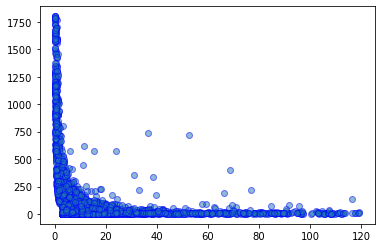

In [70]:
plt.scatter(y=under_120['duration/frequency'], x=under_120['mean_velocity'], alpha=0.5, edgecolors='b')
plt.show()

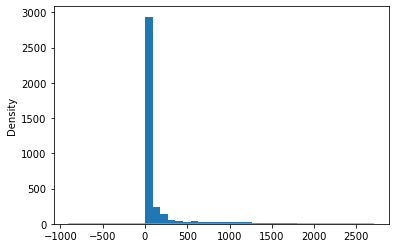

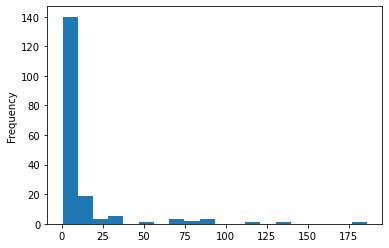

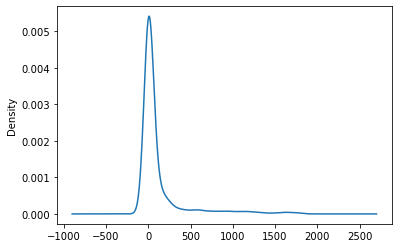

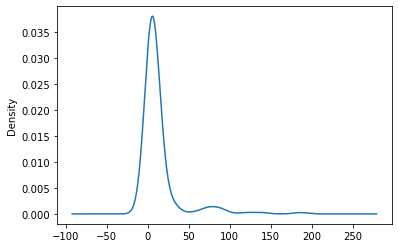

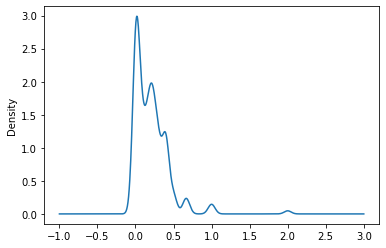

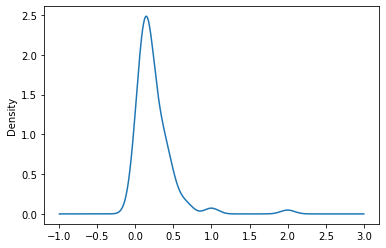

Data does not appear to be normally distributed
Data does not appear to be normally distributed


In [122]:

under_120['duration/frequency'].plot(kind='hist', bins=20)
under_120['duration/frequency'].plot(kind='kde')
plt.show()

over_120['duration/frequency'].plot(kind='hist', bins=20)
plt.show()

under_120['duration/frequency'].plot(kind='kde')
plt.show()

over_120['duration/frequency'].plot(kind='kde')
plt.show()

under_120['frequency/duration'].plot(kind='kde')
plt.show()

over_120['frequency/duration'].plot(kind='kde')
plt.show()

stat, p = stats.shapiro(under_120['frequency/duration'])

if p > 0.05:
    print("Data appears to be normally distributed")
else:
    print("Data does not appear to be normally distributed")

stat, p = stats.shapiro(over_120['frequency/duration'])

if p > 0.05:
    print("Data appears to be normally distributed")
else:
    print("Data does not appear to be normally distributed")

c:\Users\David\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


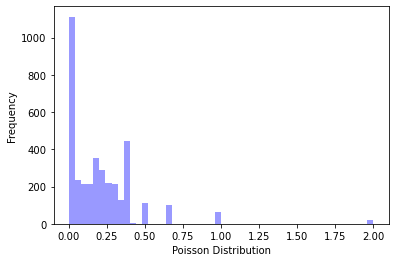

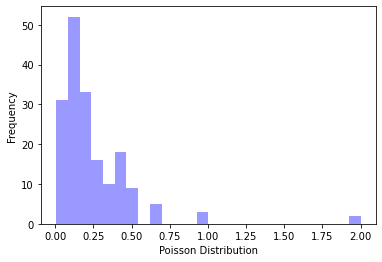

In [130]:
import seaborn as sns

ax = sns.distplot(under_120['frequency/duration'],
                  kde=False,
                  color='blue')
ax.set(xlabel='Poisson Distribution', ylabel='Frequency')
 
plt.show()

ax = sns.distplot(over_120['frequency/duration'],
                  kde=False,
                  color='blue')
ax.set(xlabel='Poisson Distribution', ylabel='Frequency')
 
plt.show()

In [137]:
from scipy.stats import chi2_contingency

data = {'Category A': under_120['frequency/duration'], 'Category B': over_120['frequency/duration']}
contingency_table = pd.DataFrame(data)

chi2, p, dof, expected = chi2_contingency(contingency_table)

if p < 0.0001:
    print("There is a significant association between Category A and Category B.")
else:
    print("There is no significant association between Category A and Category B.")

There is no significant association between Category A and Category B.


c:\Users\David\Anaconda3\lib\site-packages\scipy\stats\contingency.py:282: RuntimeWarning: invalid value encountered in less
  if np.any(observed < 0):


In [73]:
from scipy import stats
import numpy as np

under_120['duration/frequency'] = under_120['duration/frequency'].astype(float)
over_120['duration/frequency'] = over_120['duration/frequency'].astype(float)

print(under_120['duration/frequency'].mean())
print(over_120['duration/frequency'].mean())

# Perform the paired t-test
t_statistic, p_value = stats.ttest_ind(under_120['duration/frequency'], over_120['duration/frequency'])

# Analyze the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("The paired t-test results are statistically significant.")
else:
    print("The paired t-test results are not statistically significant.")

# Print the t-statistic and p-value
print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")


116.7890746798656
12.735491225100162
The paired t-test results are statistically significant.
t-statistic: 4.743358028462572
p-value: 2.1772158703694303e-06


<ipython-input-73-5ca606707f08>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  under_120['duration/frequency'] = under_120['duration/frequency'].astype(float)
<ipython-input-73-5ca606707f08>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  over_120['duration/frequency'] = over_120['duration/frequency'].astype(float)


In [17]:
grouped_20_rows.head()

,x,y,timestamp,trajectory_sid,segment_distance,segment_duration,segment_velocity (m/s),segment_velocity (km/h),segment acceleration (m/s^2)
931193,322906.188012,6.416545e+06,2019-09-04 15:58:49+02:00,1,0.000000,NaN,NaN,NaN,0.000000
931194,322874.393157,6.416413e+06,2019-09-04 15:58:54+02:00,1,135.705800,5.0,27.14116,97.708176,5.428232
931195,322844.134677,6.416278e+06,2019-09-04 15:58:59+02:00,1,138.138039,5.0,27.627608,99.459388,0.097290
931196,322816.213664,6.416140e+06,2019-09-04 15:59:04+02:00,1,141.131807,5.0,28.226361,101.614901,0.119751
931197,322794.293079,6.415999e+06,2019-09-04 15:59:09+02:00,1,142.752909,5.0,28.550582,102.782095,0.064844
...,...,...,...,...,...,...,...,...,...
17092,319653.264221,6.399424e+06,2019-10-13 15:10:41+02:00,9422,0.000000,NaN,NaN,NaN,NaN
17093,319508.304776,6.398900e+06,2019-10-13 15:11:57+02:00,9422,543.597683,76.0,7.152601,25.749364,0.094113
17094,319518.981726,6.398830e+06,2019-10-13 15:12:34+02:00,9422,70.940398,37.0,1.917308,6.902309,-0.141494
17095,319613.096197,6.398281e+06,2019-10-13 15:13:36+02:00,9422,556.770314,62.0,8.980166,32.328599,0.113917


In [ ]:
vel_means[vel_means['mean_velocity'] >= 110]

,mean_velocity,total_distance
trajectory_sid,,
76,279.681718,388.446831
82,206.590569,344.317614
1146,198.46802,1664.570491
1147,172.847754,4161.426228
1148,230.478991,832.285246
...,...,...
83442,377.408129,419.342365
83444,201.993552,658.459373
83445,123.004397,1331.482014


Tims Kod

In [91]:
points = points_df.sort_values(by=["trajectory_sid", "timestamp"])
grouped_points = points.groupby("trajectory_sid")["timestamp"].apply(list).reset_index()

heading_df = pd.merge(trajs_df, grouped_points, left_index=True, right_on="trajectory_sid", how="left")

road_80_points = [LineString([(322169, 6411344), (322081, 6412907)]), LineString([(322108, 6408320), (322143, 6408455)]), LineString([(323509, 6402118), (323445, 6402093)])]
road_80_names = ["angered", "agnesberg", "torpamotet"]

In [92]:
for road_section in range(len(road_80_points)):

    # Convert the road_section to a Shapely LineString object
    road_section_line = road_80_points[road_section]

    # Define the buffer distance (adjust as needed)
    buffer_distance = 20.0  # Adjust the buffer distance as needed (in the same units as your coordinates)

    # Create a buffered polygon around the road section
    buffered_road_section = road_80_points[road_section].buffer(buffer_distance)

    def count_cars_passing(trajectory, buffered_road_section):
        try:
            # Convert the trajectory to a Shapely LineString object
            trajectory_line = loads(trajectory)
            
            # Check if the trajectory intersects the buffered road section
            if trajectory_line.intersects(buffered_road_section):
                return 1  # This trajectory intersects the buffered road section
            else:
                return 0  # This trajectory does not intersect the buffered road section
        except:
            pass

    heading_df[road_80_names[road_section]] = heading_df['line'].apply(count_cars_passing, buffered_road_section=buffered_road_section)

In [135]:
heading_df = heading_df[(heading_df["angered"] == 1) | (heading_df["agnesberg"] == 1) | (heading_df["torpamotet"] == 1)].reset_index(drop=True)


heading_df['geometry'] = heading_df['line'].apply(wkt.loads)

# Convert DataFrame to GeoDataFrame
geodf = gpd.GeoDataFrame(heading_df, geometry='geometry')

def extract_coords_and_time(line, timestamps, point1, point2):
    coords = list(line.coords)

    distance_p1 = [Point(pt).distance(point1) for pt in coords]
    distance_p2 = [Point(pt).distance(point2) for pt in coords]
    # print(distance_p1)
    # print(distance_p2)

    closest_index_p1 = distance_p1.index(min(distance_p1))
    closest_index_p2 = distance_p2.index(min(distance_p2))
    # print(f"close index p1: {closest_index_p1}. Close index p2: {closest_index_p2}")
    # print(f"distance_p1: {min(distance_p1)}. Distance p2 {min(distance_p2)}")

    # Extract the segment between the closest points
    filtered_coords = coords[closest_index_p1:closest_index_p2 + 1]
    filtered_timestamps = timestamps[closest_index_p1:closest_index_p2 + 1]

    if len(filtered_coords) < 2:
        return None, None

    return LineString(filtered_coords), filtered_timestamps


### # kan vara fel med point1, point2 sista listan som matchar koordinaterna på dicten

distance_points = {"angered": [[Point(322169, 6411344), Point(322081, 6412907)], [(340, 360), (160, 180)]], "agnesberg": [[Point(322108, 6408320), Point(322143, 6408455)], [(10, 30), (190, 210)]], "torpamotet": [[Point(323509, 6402118), Point(323445, 6402093)], [(60, 80), (240, 260)]]}

for road_name in road_80_names:
    POINT1, POINT2 = distance_points[road_name][0]
    
    mask = geodf[road_name] == 1
    
    def wrapper(row):
        return extract_coords_and_time(row['geometry'], row['timestamp'], POINT1, POINT2)

    filtered_data = geodf[mask].apply(wrapper, axis=1, result_type="expand")

    geodf.loc[mask, 'filtered_trajectory'] = filtered_data[0]
    geodf.loc[mask, 'filtered_timestamps'] = filtered_data[1]


KeyError: 0

In [111]:
heading_df.head()

,start_time,stop_time,duration,data_points,distance,speed,line,trajectory_sid,timestamp,angered,agnesberg,torpamotet,geometry,first_timestamp


In [97]:
filt_geo = geodf[geodf.filtered_trajectory.notna()].reset_index(drop=True)

import math

def calculate_heading(x1, y1, x2, y2):
    delta_x = x2 - x1
    delta_y = y2 - y1
    theta_rad = math.atan2(delta_x, delta_y)
    theta_deg = math.degrees(theta_rad)
    if theta_deg < 0:
        theta_deg += 360
    return theta_deg

def get_headings(linestring):
    coords = list(linestring.coords)
    # headings = 0
    for i in range(len(coords) - 1):
        x1, y1 = coords[i]
        x2, y2 = coords[i+1]
        heading = calculate_heading(x1, y1, x2, y2)
        # headings.append(heading)
    return heading

# Sample DataFrame with LineString column

filt_geo['headings'] = filt_geo['filtered_trajectory'].apply(get_headings)

AttributeError: 'GeoDataFrame' object has no attribute 'filtered_trajectory'

In [98]:
# Starting with an empty mask (all False values)
mask = pd.Series([False] * len(filt_geo))

for road_name in road_80_names:  # Iterate over road names
    heading_thresholds = distance_points[road_name][1]
    road_mask = (filt_geo[road_name] == 1)  # Start with a mask for the current road

    # Construct heading-based conditions for the current road
    conditions = [
        ((filt_geo['headings'] >= threshold[0]) & (filt_geo['headings'] <= threshold[1]))
        for threshold in heading_thresholds
    ]

    # Combine conditions with OR (|)
    combined_conditions = conditions[0]
    for condition in conditions[1:]:
        combined_conditions |= condition

    # Combine road mask with heading-based conditions using AND (&)
    road_mask &= combined_conditions

    # Combine with overall mask using OR (|)
    mask |= road_mask

# Filter the dataframe using the mask
heading_df = filt_geo[mask]


NameError: name 'filt_geo' is not defined

In [99]:
heading_df['first_timestamp'] = heading_df['timestamp'].apply(lambda x: x[0] if isinstance(x, list) and x else None)
heading_df['first_timestamp'] = heading_df['first_timestamp'].astype(str)

heading_df['first_timestamp'] = heading_df['first_timestamp'].str.replace("+02:00", "").str.replace("+01:00", "")
heading_df.first_timestamp = pd.to_datetime(heading_df['first_timestamp'])

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))

colors = ['b', 'g', 'r']  # Different colors for each road
road_80_names = ["angered", "agnesberg", "torpamotet"]  # Your road names

for idx, road_name in enumerate(road_80_names):
    # Filter rows for the current road
    road_df = heading_df[heading_df[road_name] == 1]
    
    # Compute hourly average speed and counts
    road_df['hour'] = road_df['first_timestamp'].dt.hour
    hourly_avg_speed = road_df.groupby('hour')['speed'].mean().reset_index()
    hourly_counts = road_df.groupby('hour').size().reset_index(name='count')

    hour_values = hourly_avg_speed['hour'].values
    speed_values = hourly_avg_speed['speed'].values

    # Plot average speed for the current road on the left y-axis
    ax1.plot(hour_values, speed_values, marker='o', linestyle='-', color=colors[idx], label=f'Average Speed ({road_name})')
    
    # Plot number of instances for the current road on the right y-axis
    ax2 = ax1.twinx()
    ax2.bar(hourly_counts['hour'] + 0.2*(idx-1), hourly_counts['count'], color=colors[idx], alpha=0.5, label=f'Number of Instances ({road_name})', width=0.2)
    ax2.set_ylabel(f'Number of Instances ({road_name})', color=colors[idx])
    ax2.tick_params('y', colors=colors[idx])

ax1.set_xlabel('Hour')
ax1.set_ylabel('Average Speed')
ax1.set_xticks(hourly_avg_speed['hour'])
ax1.grid(True)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Average Speed and Number of Instances by Hour')
fig.tight_layout()
plt.show()

